In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


#Main

In [ ]:
from time import time
from itertools import combinations
from math import ceil

class Apriori:
  def __init__(self, *args, **kwargs):
    self.path = kwargs['path']
    self.total = self.__get_total()
    # self.__mine()


  def __get_total(self):
    with open(self.path, 'r') as f:
      count = 0
      for line in f:
        count += 1
    return count


  def __generate_initial_candidate(self):
    with open(self.path, 'r') as f:
      temp = {}
      for line in f:
        transaction = set(line.split())
        for item in transaction:
          try:
            temp[(item,)] += 1
          except KeyError:
            temp[(item,)] = 1
      return {i:temp[i] for i in sorted(temp)}


  def __find_frequent_patterns(self, candidates):
    temp = {}
    for i in candidates:
      if candidates[i] >= self.threshold:
        temp[i] = candidates[i]
    if not temp:
      return

    self.L.append(temp)

    self.__find_candidates(list(self.L[-1].keys()))


  def __is_joinable(self, key1, key2):
    # if len(key1) == 1:
    #   return True
    if key1[:-1] == key2[:-1]:
      return True
    else:
      return False


  def __check_downward(self, key):
    all = combinations(key, len(key)-1)
    for i in all:
      if i not in self.L[-1]:
        return False

    return True


  def __find_candidates(self, results):
    temp = {}

    for i in range(0, len(results)-1):
      for j in range(i+1, len(results)):

        if self.__is_joinable(results[i], results[j]):
          joined = results[i] + (results[j][-1],)

          if self.__check_downward(joined):
            temp[joined] = self.frequency(joined)
            # print(joined, end=" : ")
            # print(temp[joined])

    if not temp:
      return

    self.C.append(temp)

    self.__find_frequent_patterns(self.C[-1])


  def mine(self, *args, **kwargs):
    self.C = []
    self.L = []
    self.threshold = ceil(self.total*kwargs['threshold'])
    print(f"total transactions {self.total}")
    print(f"threshold {self.threshold}")

    start = time()
    self.C.append(self.__generate_initial_candidate())
    self.__find_frequent_patterns(self.C[-1])
    end = time()

    print()
    print(f"completed in {end-start} secs")


  def frequency(self, pattern):
    with open(self.path, 'r') as f:
      count = 0

      for line in f:
        flag = True

        transaction = set(line.split())
        for i in pattern:
          if i not in transaction:
            flag = False
            break

        if flag == True:
          count += 1
      return count

  def count_frequent_pattern(self):
    print()
    print(f"lengthwise frequent pattern count for threshold {self.threshold}")
    for i in self.L:
      # print(i)
      print(f"length {len(list(i.keys())[0])} : {len(i)}")


  def show_frequent_patterns(self):
    for pattern_list in self.L:
      for pattern in pattern_list:
        print(pattern, end=' : ')
        print(pattern_list[pattern])

##chess data

In [ ]:
chess = Apriori(path='/content/drive/MyDrive/cse477/chess.dat.txt')

In [ ]:
chess.mine(threshold=0.9)
chess.count_frequent_pattern()

total transactions 3196
threshold 2877

completed in 12.740272998809814 secs

lengthwise frequent pattern count for threshold 2877
length 1 : 13
length 2 : 68
length 3 : 167
length 4 : 203
length 5 : 128
length 6 : 39
length 7 : 4


In [ ]:
chess.mine(threshold=0.8)
chess.count_frequent_pattern()

total transactions 3196
threshold 2557

completed in 166.63649249076843 secs

lengthwise frequent pattern count for threshold 2557
length 1 : 19
length 2 : 141
length 3 : 566
length 4 : 1383
length 5 : 2130
length 6 : 2104
length 7 : 1314
length 8 : 481
length 9 : 85
length 10 : 4


In [ ]:
chess.mine(threshold=0.7)
chess.count_frequent_pattern()

total transactions 3196
threshold 2238

completed in 1019.1805129051208 secs

lengthwise frequent pattern count for threshold 2238
length 1 : 24
length 2 : 238
length 3 : 1237
length 4 : 3857
length 5 : 7891
length 6 : 11125
length 7 : 11113
length 8 : 7916
length 9 : 3895
length 10 : 1216
length 11 : 204
length 12 : 14
length 13 : 1


In [ ]:
chess.mine(threshold=0.6)
chess.count_frequent_pattern()

total transactions 3196
threshold 1918

completed in 6892.888777971268 secs

lengthwise frequent pattern count for threshold 1918
length 1 : 34
length 2 : 389
length 3 : 2325
length 4 : 8831
length 5 : 23155
length 6 : 43106
length 7 : 57479
length 8 : 55062
length 9 : 37876
length 10 : 18607
length 11 : 6419
length 12 : 1466
length 13 : 187
length 14 : 8


###plot

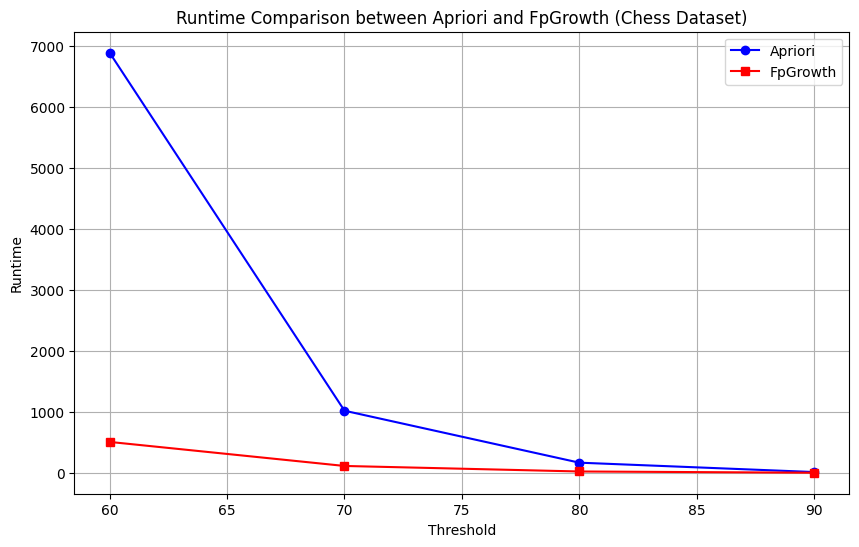

In [ ]:
import matplotlib.pyplot as plt

# Threshold percentages
thresholds = [90, 80, 70, 60]

# Data for the first set of values
data_set1 = [12.740272998809814, 166.63649249076843, 1019.1805129051208, 6892.888777971268]

# Data for the second set of values
data_set2 = [1.6963958740234375, 22.06865382194519, 112.72999906539917, 507.0605103969574]

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the first set of data
plt.plot(thresholds, data_set1, marker='o', linestyle='-', color='b', label='Apriori')

# Plot the second set of data on the same graph
plt.plot(thresholds, data_set2, marker='s', linestyle='-', color='r', label='FpGrowth')

plt.xlabel("Threshold")
plt.ylabel("Runtime")
plt.title("Runtime Comparison between Apriori and FpGrowth (Chess Dataset)")
plt.grid(True)
plt.legend()

plt.show()


##mushroom

In [ ]:
mushroom = Apriori(path='/content/drive/MyDrive/cse477/mushroom.dat')

In [ ]:
mushroom.mine(threshold=0.9)
mushroom.count_frequent_pattern()

total transactions 8124
threshold 7312

completed in 0.2526240348815918 secs

lengthwise frequent pattern count for threshold 7312
length 1 : 4
length 2 : 4
length 3 : 1


In [ ]:
mushroom.mine(threshold=0.8)
mushroom.count_frequent_pattern()

total transactions 8124
threshold 6500

completed in 0.5689189434051514 secs

lengthwise frequent pattern count for threshold 6500
length 1 : 5
length 2 : 9
length 3 : 7
length 4 : 2


In [ ]:
mushroom.mine(threshold=0.7)
mushroom.count_frequent_pattern()

total transactions 8124
threshold 5687

completed in 0.7661359310150146 secs

lengthwise frequent pattern count for threshold 5687
length 1 : 5
length 2 : 10
length 3 : 10
length 4 : 5
length 5 : 1


In [ ]:
mushroom.mine(threshold=0.6)
mushroom.count_frequent_pattern()

total transactions 8124
threshold 4875

completed in 1.628702163696289 secs

lengthwise frequent pattern count for threshold 4875
length 1 : 8
length 2 : 18
length 3 : 17
length 4 : 7
length 5 : 1


###plot

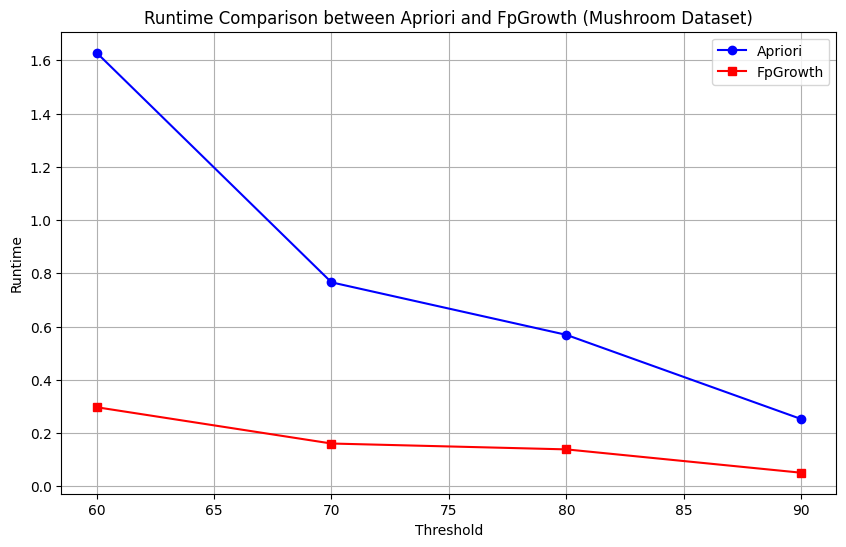

In [ ]:
import matplotlib.pyplot as plt

# Threshold percentages
thresholds = [90, 80, 70, 60]

# Data for the first set of values
data_set1 = [0.2526240348815918, 0.5689189434051514, 0.7661359310150146, 1.628702163696289]

# Data for the second set of values
data_set2 = [0.05096316337585449, 0.13865876197814941, 0.16063976287841797, 0.29703569412231445]

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the first set of data
plt.plot(thresholds, data_set1, marker='o', linestyle='-', color='b', label='Apriori')

# Plot the second set of data on the same graph
plt.plot(thresholds, data_set2, marker='s', linestyle='-', color='r', label='FpGrowth')

plt.xlabel("Threshold")
plt.ylabel("Runtime")
plt.title("Runtime Comparison between Apriori and FpGrowth (Mushroom Dataset)")
plt.grid(True)
plt.legend()

plt.show()
